In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
N_t=5000    #per il metodo dei trapezi
N_fun=501   #per il campionamento dei grafici di funzioni
N_mc=51     #per il campionamento di A(x) con Monte Carlo (se è grande il tempo di esecuzione aumenta rapidamente)
MC=10**6    #n. di punti per il metodo Monte Carlo
pi=np.pi

f = lambda x: np.sqrt(1-x**2)

Theta = np.linspace(0,2*pi,1000)
X=np.cos(Theta)
Y=np.sin(Theta)


A_t=0                      #Area cerchio (trapezi)
dh=2/N_t
for k in range(N_t):
    A_t+= dh/2 * (f(-1 + k*dh) + f(-1 + (k+1)*dh))
A_t*=2

c=0                        #Area cerchio (Monte Carlo)
for k in range(MC):
    x= random()
    y= random()
    if x**2+y**2<=1:
        c+=1
A_mc = 4*c/MC


def Area_t(x0):            #Area intersezione (trapezi), v. fine programma
    if abs(x0)>=2:
        return 0
    elif 0<=x0<2:
        A=0
        dh=(1-x0/2)/N_t
        for k in range(N_t):
            A+= dh/2 * (f(x0/2 + k*dh) + f(x0/2 + (k+1)*dh))
        return 4*A
    else: return Area_t(-x0)

def Area_esatta(x0):
    if abs(x0)>2: return 0
    else: return pi - 2*np.arcsin(abs(x0)/2) - abs(x0)*np.sqrt(1-x0**2/4)

X_t=np.linspace(-2.25,2.25,N_fun)
Y_t, Y_e = np.empty(N_fun), np.empty(N_fun)
for k in range(N_fun):
    Y_t[k]=Area_t(X_t[k])
    Y_e[k] = Area_esatta(X_t[k])

In [2]:
def Area_mc(x0):           #Area intersezione (Monte Carlo, più lento)
    c=0
    if x0>=0:
        for k in range(MC):
            x= -1 + (x0+2)*random()
            y= -1 + 2*random()
            if x**2 + y**2<=1 and (x-x0)**2 + y**2<=1:
                c+=1
        return c * 2*(x0+2)/MC
    else: return Area_mc(-x0)

X_mc=np.linspace(-2.25,2.25,N_mc)
Y_mc = np.empty(N_mc)
for k in range(N_mc):
    Y_mc[k]=Area_mc(X_mc[k])

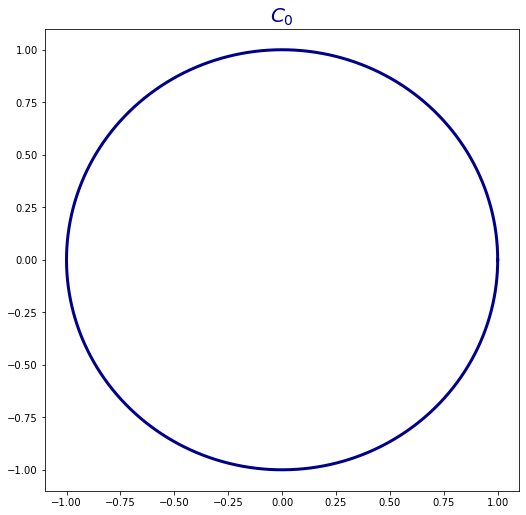

Area esatta: π = 3.14159265
Area calcolata con trapezi: 3.14158325
Area calcolata con Monte Carlo: 3.144364
Errore relativo (trapezi): -0.000299 %
Errore relativo (Monte Carlo): 0.088215 %

Seguono i grafici di A(x) coi metodi dei trapezi e di Monte Carlo, confrontati col valore esatto:


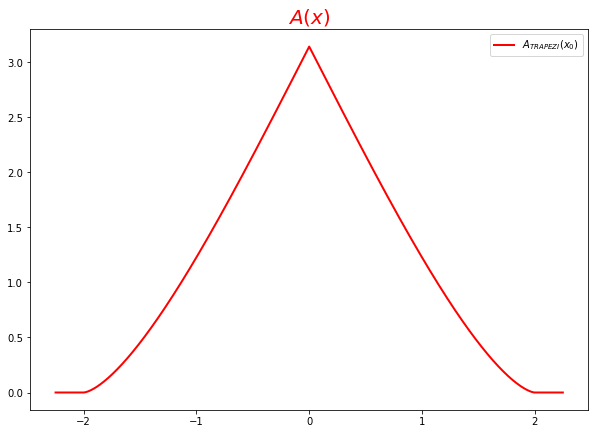

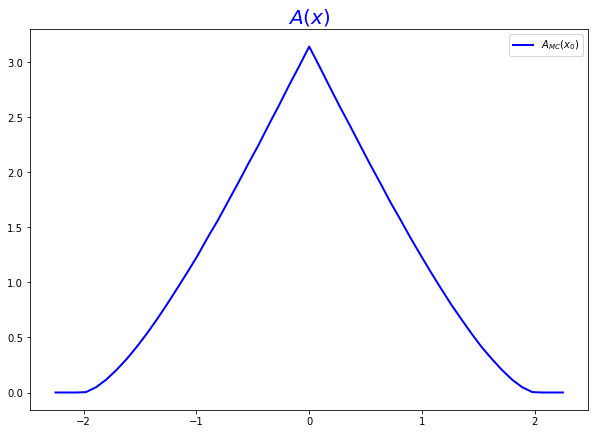

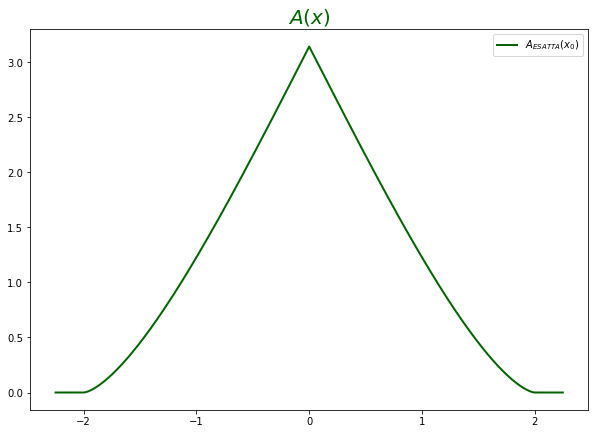

In [3]:
plt.figure(figsize=(8.5,8.5))
plt.plot(X,Y,color='darkblue',linewidth=3)
plt.title('$C_0$',color='darkblue',size=20)
plt.show()

print('Area esatta: π =',round(pi,8))
print('Area calcolata con trapezi:',round(A_t,8))
print('Area calcolata con Monte Carlo:',round(A_mc,8))
print('Errore relativo (trapezi):', round((A_t-pi)/pi*100,6),'%')
print('Errore relativo (Monte Carlo):', round((A_mc-pi)/pi*100,6),'%\n')

print("Seguono i grafici di A(x) coi metodi dei trapezi e di Monte Carlo, confrontati col valore esatto:")
plt.figure(figsize=(10,7))
plt.plot(X_t,Y_t,color='r',linewidth=2,label='$A_{TRAPEZI}(x_0)$')
plt.title('$A(x)$',color='r',size=20)
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.plot(X_mc,Y_mc,color='b',linewidth=2,label='$A_{MC}(x_0)$')
plt.title('$A(x)$',color='b',size=20)
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.plot(X_t,Y_e,color='darkgreen',linewidth=2,label='$A_{ESATTA}(x_0)$')
plt.title('$A(x)$',color='darkgreen',size=20)
plt.legend()
plt.show()

E=(Y_mc/Area_esatta(X_mc))-1

Il calcolo dell'area dell'intersezione si basa sulle seguenti considerazioni:
Sia $x_0$ l'ascissa del centro di $C_x$ - [qui](https://www.geogebra.org/m/hz73qbmj) l'animazione - allora l'ascissa dei due punti d'intersezione di $C_0,C_x$ è data dalla risoluzione del sistema

$C_0 \;: x^2 + y^2 = 1 \\
C_{x_0}: (x-x_0)^2 + y^2 = 1$

Sottraendo membro a membro, si ricava

$x^2 - (x-x_0)^2 = 0 \\
(x-x+x_0)(x+x-x_0)=0 \\
x_0\; (2x - x_0)=0 \\
x_{P_{1,2}}=x_0/2$

Per ora supponiamo che $x_0\in [0,2]$. L'area dell'intersezione è data dalla somma di quattro contributi:

$\displaystyle a_1=\int_{x_0-1}^{x_0/2} \sqrt{1-(x-x_0)^2}dx \\
\displaystyle a_3=\int_{x_0/2}^1 \sqrt{1-x^2}dx \\
a_2=a_1 \\
a_4=a_3$

per simmetria. Si prova anche che vale $a_1=a_3$: posto $x-x_0\equiv x'$, si ha

$\displaystyle a_1 = \int_{-1}^{-x_0/2} \sqrt{1-x'^2}dx'$ e per la parità dell'integranda, ponendo ora $x\equiv -x'$, si ha:

$\displaystyle a_1 = \int_{x_0/2}^1 \sqrt{1-x^2}dx=a_3$

Quindi $a_1=a_2=a_3=a_4$. Scegliamo l'espressione di $a_3$:

$\displaystyle a_3=\int_{x_0/2}^1 \sqrt{1-x^2}dx$

Infatti, la formula utilizzata (mediante i trapezi) nel programma per $A(x_0)$ è stata:

$\displaystyle \fbox{$ A_t(x_0) = 4 \int_{x_0/2}^1f(x)\;dx $}$ ove $f(x)=\sqrt{1-x^2}$. La risoluzione analitica è per sostituzione:

$x \equiv \sin t; \; dx=\cos t\;dt; \; [x_0/2,1] \rightarrow [\arcsin (x_0/2),\pi/2] \\
\displaystyle a_3 = \int_{\arcsin (x_0/2)}^{\pi/2} \cos^2tdt \\
\displaystyle = \int_{\arcsin (x_0/2)}^{\pi/2} \frac{1+\cos 2t}{2}dt \\
=\displaystyle \left[ \frac{t}{2} + \frac{\sin 2t}{4} \right]_{\arcsin (x_0/2)}^{\pi/2} \\
\displaystyle = \frac{\pi}{4} - \frac{1}{2}\arcsin(x_0/2) -\frac{1}{4} \sin (2 \arcsin(x_0/2))$

ove $\sin(2 \arcsin u) = 2 \sin(\arcsin u) \cos(\arcsin u) = 2 \sin(\arcsin u) \sqrt{1- \sin^2(\arcsin u)} = 2u \sqrt{1-u^2} \;\;\;\;\;\; [u\equiv x_0/2]$

$\displaystyle \Rightarrow a_3 = \frac{\pi}{4} - \frac{1}{2}\arcsin(x_0/2) -\frac{1}{2} x_0/2 \sqrt{1-(x_0/2)^2}$

Per cui

$\displaystyle A_{esatta}(x_0) = 4a_3(x_0) = \pi - 2 \arcsin(x_0/2) - x_0 \sqrt{1-x_0^2/4} $

Nel caso in cui $x_0 \in [-2,0]$, per la simmetria del sistema, ci aspettiamo di ritrovare lo stesso risultato: $|x_0|$ rappresenta la distanza fra i due centri, ed è indipendente dalla scelta del verso dell'asse $x$. Quindi l'espressione di $A(x_0)$ non deve dipendere dal segno di $x_0$. Possiamo quindi porre

$A(x_0) \equiv A(-x_0)$ per $x_0 \in [-2,0]$.

Infine, nel caso $|x_0|>2$, le due circonferenze non si intersecano. Concludiamo che

$\displaystyle \fbox{$ A(x)={\begin{cases} \pi - 2 \arcsin \left(\frac{|x|}{2} \right) - |x| \sqrt{1-\frac{x^2}{4}} \; : -2\leqslant x \leqslant 2 \\ 0 \ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; : |x|>2 \end{cases}} $}$

Essendo $x$ l'ascissa del centro di $C_x$. Prevedibilmente, $A(0)=\pi$ (caso delle circonferenze sovrapposte); $A(\pm 2)=0$ (caso delle circonferenze tangenti e prive di punti interni in comune).


Per il calcolo di $A(x_0)$ con Monte Carlo si sfrutta sempre la simmetria in $x$, per cui si pone $A(x_0)\equiv A(-x_0)$ nel caso in cui $x_0<0$. Per $x_0\geqslant 0$ si ragiona come segue: si generano $N=$ ```MC``` punti distribuiti casualmente nella regione di piano $[-1, x_0+1] \times [-1,1]$ (il rettangolo minimale contenente entrambi i cerchi). Il contatore ```c``` aumenta per ogni punto generato nell'intersezione (cosa che si verifica quando le disequazioni di entrambi i cerchi sono verificate). La stima dell'area dell'intersezione è data quindi dal rapporto finale ```c```/```MC```, normalizzato con l'area totale del rettangolo di partenza: $A_0 = 2(x_0+2)$.